# descriptive.ipynb

This notebook calculated descriptive statistics in detail. The main notebook reports just a summary.

The `display_summary_table` and `plot_descriptive` functions below are called from the main notebook.

<br>
<br>

In [1]:
from IPython.display import display,Markdown #,HTML
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd


def display_title(s, pref='Figure', num=1, center=False):
    ctag = 'center' if center else 'p'
    s    = f'<{ctag}><span style="font-size: 1.2em;"><b>{pref} {num}</b>: {s}</span></{ctag}>'
    if pref=='Figure':
        s = f'{s}<br><br>'
    else:
        s = f'<br><br>{s}'
    display( Markdown(s) )



Below the previously developed `parse_data.ipynb` notebook is run. See that notebook for details.

In [2]:
%run parse_data.ipynb

df.describe()


                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility

,total_energy,t_in,h_in,t_out,h_out,windspeed,visibility
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,14514.782609,20.812248,41.263508,7.421253,79.789718,4.046721,38.358297
std,4531.328613,1.775129,3.645425,4.634690,9.033347,1.951432,4.661956
min,5400.000000,16.338792,35.319880,-2.937847,50.468750,1.000000,29.576389
25%,11537.500000,19.650519,38.315984,4.078646,74.563368,2.660590,35.358507
50%,13920.000000,20.526286,40.547303,7.039236,80.277778,3.637153,37.883681
75%,16272.500000,21.694637,44.060581,9.859809,86.014757,4.922743,40.735491
max,27690.000000,25.347047,49.927046,19.372569,97.069444,10.631944,58.600694


To create a custom display of descriptive statistics, let's first define functions that will calculate central tendency and dispersion metrics.

Refer also to [this notebook](https://github.com/0todd0000/OpenBook-DataAnalysisPracticeInPythonAndJupyter/blob/master/Lessons/Lesson04/5-Examples/DescriptiveStatsExamples.ipynb) for details regarding how create custom descriptive statistics tables.

In [3]:
def central(x, print_output=True):
    x0     = np.mean( x )
    x1     = np.median( x )
    x2     = stats.mode( x ).mode
    return x0, x1, x2


def dispersion(x, print_output=True):
    y0 = np.std( x ) # standard deviation
    y1 = np.min( x )  # minimum
    y2 = np.max( x )  # maximum
    y3 = y2 - y1      # range
    y4 = np.percentile( x, 25 ) # 25th percentile (i.e., lower quartile)
    y5 = np.percentile( x, 75 ) # 75th percentile (i.e., upper quartile)
    y6 = y5 - y4 # inter-quartile range
    return y0,y1,y2,y3,y4,y5,y6

<br>

Let's now assemble and display a central tendency table:

</br>

In [4]:
def display_central_tendency_table(num=1):
    display_title('Central tendency summary statistics.', pref='Table', num=num, center=False)
    df_central = df.apply(lambda x: central(x), axis=0)
    round_dict = {'quality': 3, 'acidity': 3, 'density': 6, 'sugar': 3}
    df_central = df_central.round( round_dict )
    row_labels = 'mean', 'median', 'mode'
    df_central.index = row_labels
    display( df_central )

display_central_tendency_table(num=1)

<br><br><p><span style="font-size: 1.2em;"><b>Table 1</b>: Central tendency summary statistics.</span></p>

,total_energy,t_in,h_in,t_out,h_out,windspeed,visibility
mean,14514.782609,20.812248,41.263508,7.421253,79.789718,4.046721,38.358297
median,13920.000000,20.526286,40.547303,7.039236,80.277778,3.637153,37.883681
mode,20320.000000,16.338792,35.319880,4.321181,50.468750,2.784722,36.208333


<br>

Let's repeat for a dispersion table:

</br>

In [5]:
def display_dispersion_table(num=1):
    display_title('Dispersion summary statistics.', pref='Table', num=num, center=False)
    round_dict            = {'quality': 3, 'acidity': 3, 'density': 6, 'sugar': 3}
    df_dispersion         = df.apply(lambda x: dispersion(x), axis=0).round( round_dict )
    row_labels_dispersion = 'st.dev.', 'min', 'max', 'range', '25th', '75th', 'IQR'
    df_dispersion.index   = row_labels_dispersion
    display( df_dispersion )

display_dispersion_table(num=2)


<br><br><p><span style="font-size: 1.2em;"><b>Table 2</b>: Dispersion summary statistics.</span></p>

,total_energy,t_in,h_in,t_out,h_out,windspeed,visibility
st.dev.,4514.880905,1.768686,3.632193,4.617867,9.000558,1.944348,4.645034
min,5400.000000,16.338792,35.319880,-2.937847,50.468750,1.000000,29.576389
max,27690.000000,25.347047,49.927046,19.372569,97.069444,10.631944,58.600694
range,22290.000000,9.008254,14.607166,22.310417,46.600694,9.631944,29.024306
25th,11537.500000,19.650519,38.315984,4.078646,74.563368,2.660590,35.358507
75th,16272.500000,21.694637,44.060581,9.859809,86.014757,4.922743,40.735491
IQR,4735.000000,2.044118,5.744597,5.781163,11.451389,2.262153,5.376984


Let's save the variables in easier-to-use variable names:

In [6]:
y   = df['total_energy']
t_in  = df['t_in']
t_out = df['t_out']
h_in  = df['h_in']
h_out = df['h_out']
wind  = df['windspeed']
vis   = df['visibility']

Let's create scatterplots for the DV (quality) vs. each of the six IVs:

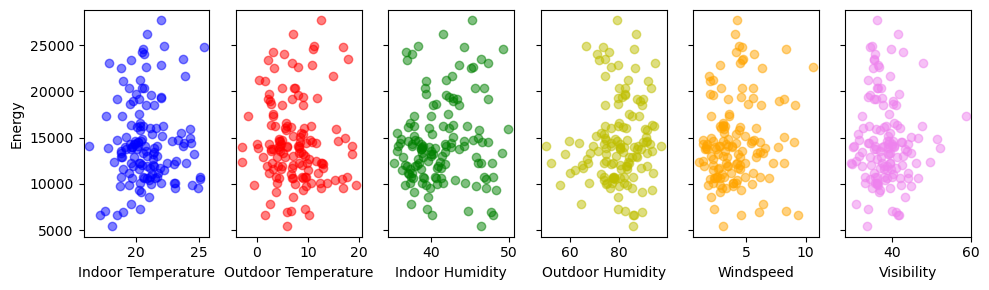

In [7]:
fig,axs = plt.subplots( 1, 6, figsize=(10,3), tight_layout=True )
axs[0].scatter( t_in, y, alpha=0.5, color='b' )
axs[1].scatter( t_out, y, alpha=0.5, color='r' )
axs[2].scatter( h_in, y, alpha=0.5, color='g' )
axs[3].scatter( h_out, y, alpha=0.5, color='y' )
axs[4].scatter( wind, y, alpha=0.5, color='orange' )
axs[5].scatter( vis, y, alpha=0.5, color='violet' )

xlabels = 'Indoor Temperature', 'Outdoor Temperature', 'Indoor Humidity', 'Outdoor Humidity', 'Windspeed', 'Visibility'
[ax.set_xlabel(s) for ax,s in zip(axs,xlabels)]
axs[0].set_ylabel('Energy')
[ax.set_yticklabels([])  for ax in axs[1:]]
plt.show()

Next let's add regression lines and correlation coefficients to each plot:

In [8]:
def corrcoeff(x, y):
    r = np.corrcoef(x, y)[0,1]
    return r

def plot_regression_line(ax, x, y, **kwargs):
    a,b   = np.polyfit(x, y, deg=1)
    x0,x1 = min(x), max(x)
    y0,y1 = a*x0 + b, a*x1 + b
    ax.plot([x0,x1], [y0,y1], **kwargs)

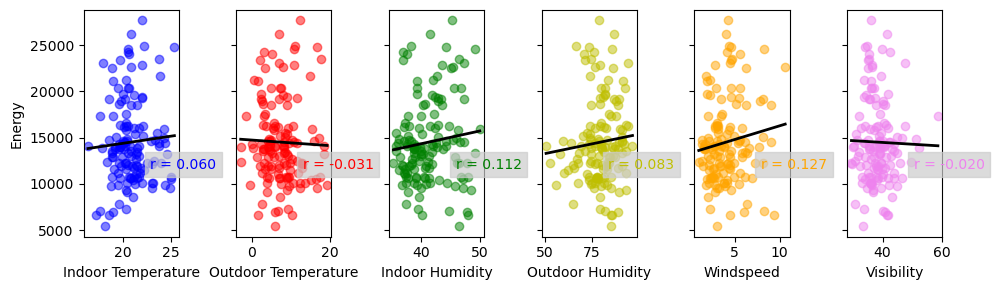

In [9]:
fig,axs = plt.subplots( 1, 6, figsize=(10,3), tight_layout=True )
ivs     = [t_in, t_out, h_in, h_out, wind, vis]
colors  = 'b', 'r', 'g', 'y', 'orange', 'violet'
for ax,x,c in zip(axs, ivs, colors):
    ax.scatter( x, y, alpha=0.5, color=c )
    plot_regression_line(ax, x, y, color='k', ls='-', lw=2)
    r   = corrcoeff(x, y)
    ax.text(0.7, 0.3, f'r = {r:.3f}', color=c, transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))

xlabels = 'Indoor Temperature', 'Outdoor Temperature', 'Indoor Humidity', 'Outdoor Humidity', 'Windspeed', 'Visibility'
[ax.set_xlabel(s) for ax,s in zip(axs,xlabels)]
axs[0].set_ylabel('Energy')
[ax.set_yticklabels([])  for ax in axs[1:]]
plt.show()

<p><span style="font-size: 1.2em;"><b>Figure 1</b>: Correlations amongst main variables.</span></p><br><br>

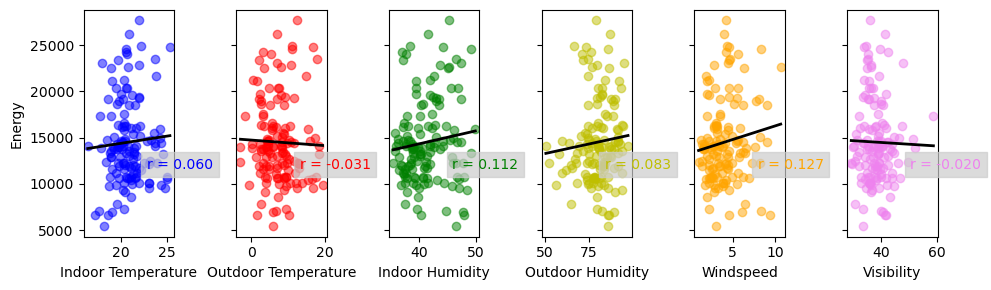

In [10]:
def plot_descriptive():

    fig,axs = plt.subplots( 1, 6, figsize=(10,3), tight_layout=True )
    ivs     = [t_in, t_out, h_in, h_out, wind, vis]
    colors  = 'b', 'r', 'g', 'y', 'orange', 'violet'
    for ax,x,c in zip(axs, ivs, colors):
        ax.scatter( x, y, alpha=0.5, color=c )
        plot_regression_line(ax, x, y, color='k', ls='-', lw=2)
        r   = corrcoeff(x, y)
        ax.text(0.7, 0.3, f'r = {r:.3f}', color=c, transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))

    xlabels = 'Indoor Temperature', 'Outdoor Temperature', 'Indoor Humidity', 'Outdoor Humidity', 'Windspeed', 'Visibility'
    [ax.set_xlabel(s) for ax,s in zip(axs,xlabels)]
    axs[0].set_ylabel('Energy')
    [ax.set_yticklabels([])  for ax in axs[1:]]

    display_title('Correlations amongst main variables.', pref='Figure', num=1)

plot_descriptive()